In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

### You measure distributions of spike rates before and after application of a novel compound. Did the compound affect average spike rate?

In [45]:
spike_rates_before = np.array([1.08196055, 1.46511599, 3.94755959, 5.60877699, 1.07255503,
       1.73148915, 7.74913949, 0.46568865, 0.85192807, 0.45485399,
       0.21147763, 0.7328264 , 0.63779963, 1.07385188, 1.17355484,
       8.09630879, 1.15065957, 1.14864192, 0.52859319, 0.35160876,
       0.18716119, 1.22805388, 1.66936837, 0.49114162, 0.48303596,
       0.1890193 , 0.97342932, 5.50919191, 0.08105765, 1.06542054,
       1.70741002, 0.55428141, 0.43270933, 0.37440498, 2.31137555,
       3.12620143, 1.30310539, 1.93251136, 0.41843247, 5.46019724,
       0.67767039, 3.08759338, 1.45157212, 0.83090078, 2.30353931,
       1.95626348, 1.11424689, 0.55423274, 1.05902288, 2.51941554,
       1.04998917, 1.06172509, 0.22986294, 3.25425347, 2.37682344,
       1.4707546 , 5.35829895, 1.15740463, 1.75913584, 0.31468411,
       5.23033742, 6.70582406, 0.21313866, 0.27023672, 5.68223601,
       2.99078551, 2.66228782, 2.53433928, 1.85840469, 0.46538514,
       0.87241709, 0.98391613, 0.81255331, 0.69386584, 1.11926468,
       2.69873688, 0.59983432, 0.81745927, 1.33407333, 2.63997673,
       1.13398481, 0.47476624, 0.5185762 , 1.05637879, 4.16636295,
       0.46865835, 1.29082939, 0.4572478 , 0.37527849, 0.43349154,
       0.23884018, 1.52354714, 0.47723544, 0.58682967, 0.2542733 ,
       3.58767709, 0.71510616, 0.6709575 , 1.11170712, 0.40371517])
spike_rates_after = np.array([9.84650197e-02, 1.74915871e+00, 3.70126468e+00, 8.02999946e-02,
       2.87605053e-01, 5.39786892e-02, 6.28671826e-01, 1.81377427e+00,
       5.97545659e+00, 7.83836589e-01, 1.07560552e+00, 1.06696807e-01,
       5.06701501e+01, 3.25573242e-01, 1.34906831e+01, 3.02807679e-02,
       1.71642511e-01, 3.04369723e-02, 3.21587810e+00, 1.46174954e+02,
       8.88075760e-01, 1.70338077e+00, 1.35915008e+01, 6.08743780e-01,
       1.60612793e-01, 4.23029618e-01, 2.56158535e-01, 1.65163062e-02,
       1.25763588e+01, 1.26025013e+01, 2.52530656e-02, 3.63746712e-01,
       7.80581789e-01, 2.92782650e+01, 1.83391572e+00, 6.43014647e-02,
       1.65783353e-01, 2.69354465e-01, 4.70024730e-01, 1.14701105e+00,
       2.51870444e-01, 9.10029899e+00, 9.10249290e-02, 5.97971260e-01,
       2.11819364e+00, 1.35241090e+00, 1.01277438e-01, 2.41792530e-01,
       6.40905968e+00, 2.20919567e+00, 7.39314909e-01, 9.33600851e-03,
       6.06346318e+00, 7.47866920e+00, 7.82180475e-02, 1.51147028e-01,
       8.57403175e-02, 8.47991974e+00, 9.71545313e-01, 9.13930051e-02,
       2.72011602e+00, 1.23872107e-01, 2.97508680e+00, 1.73444115e-01,
       6.79658605e-01, 1.56533835e+01, 5.48440258e-01, 1.67864175e+00,
       1.87342142e-01, 1.31443570e+00, 1.14485756e-01, 2.78066922e-01,
       2.14251943e+00, 2.23295403e+00, 2.39476146e-01, 1.93936178e+00,
       4.78377362e+00, 1.33918232e+00, 1.29157655e-01, 1.12447852e+00,
       2.88173709e-01, 7.94608224e+00, 7.75678773e-02, 1.87512660e-01,
       1.42439969e-01, 2.16405001e+01, 8.86623444e-01, 8.71129829e+00,
       4.72415352e-01, 1.68587105e-01, 3.29339638e+00, 2.31926984e+00,
       5.85195968e-02, 1.30619297e+00, 9.37931698e-02, 9.88742360e-01,
       3.03376572e+01, 6.75220652e-01, 2.50898483e+00, 2.92173319e-01])

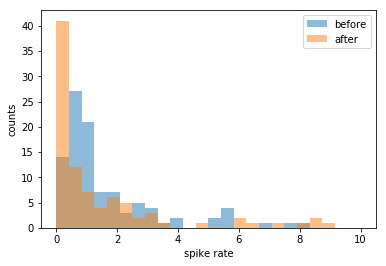

In [46]:
plt.hist(spike_rates_before, bins=np.linspace(0, 10, 25), alpha=0.5, label='before')
plt.hist(spike_rates_after, bins=np.linspace(0, 10, 25), alpha=0.5, label='after')
plt.xlabel('spike rate')
plt.ylabel('counts')
plt.legend();

0.0091

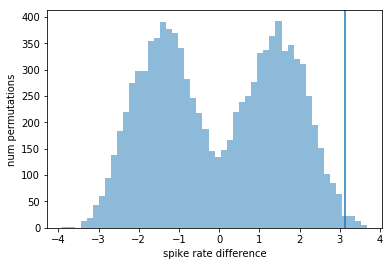

In [47]:
nbefore = len(spike_rates_before)
nafter = len(spike_rates_after)

avg_rate_diff = spike_rates_after.mean() - spike_rates_before.mean()

all_data = np.zeros((nbefore + nafter,))
all_data[:nbefore] = spike_rates_before
all_data[-nafter:] = spike_rates_after

nperms = 10000
perm_avg_rate_diff = np.zeros((nperms,))
for i in range(nperms):
    np.random.shuffle(all_data)
    permuted_before = all_data[:nbefore]
    permuted_after = all_data[-nafter:]
    perm_avg_rate_diff[i] = permuted_after.mean() - permuted_before.mean()

plt.hist(perm_avg_rate_diff, bins=50, alpha=0.5);
plt.axvline(avg_rate_diff)
plt.xlabel('spike rate difference')
plt.ylabel('num permutations')

pvalue = (np.abs(perm_avg_rate_diff) > np.abs(avg_rate_diff)).sum() / nperms
pvalue

### You measure a protein's expression level in control and mutant mice in hippocampus. Does the mutation affect this protein's average expression level?

In [39]:
control_expr = np.array([167.59842547, 261.65208986, 127.85285239, 249.75210004,
       209.27103318, 221.58690228, 120.07649914, 235.93551262,
       186.48234757, 168.36978519, 268.51141871, 133.47118232,
       241.65026402, 134.80257395, 300.85791472, 192.19429857,
       158.48992016, 115.89681508, 203.8995667 , 185.85661836,
       170.34785592, 196.93449885, 179.48406494, 153.78481218,
       244.7189858 , 214.02424154, 262.32127445, 185.56289501,
       160.35473509, 198.32770146, 134.06329292, 256.35979852,
       253.29709563, 278.62341361, 168.84615446, 154.76603728,
       218.48325215, 168.36009011, 150.96410177, 167.14258804,
       185.91960215, 273.73573074, 166.54548678, 148.11649294,
       236.72347354, 103.106309  , 150.20353379, 259.00140765,
       235.22964778, 256.27188949])
mutant_expr = np.array([201.94302979, 256.63490843, 176.34010367, 189.34234125,
       255.44239431, 252.70721674, 187.43632923, 166.21208539,
       242.12855084, 224.81008449, 189.8142131 , 165.95821481,
       139.06570971, 199.46422751, 184.05257076, 200.26101768,
       183.3953557 , 219.02716816, 201.84830686, 229.35997007,
       189.20326891, 214.66054298, 177.94325691, 247.01214529,
       168.77432054, 131.91732389, 183.68874135, 194.5250103 ,
       164.50252682, 182.18373066,
       200.90909578, 197.47380421, 200.31448698, 242.18368187,
       204.36766056, 212.4688213 , 217.10686226, 222.80587562,
       205.43582137, 232.8776799 , 257.60141891, 249.31855187,
       217.62192899, 221.53674565, 200.31183389, 233.72982089,
       243.15271211, 188.81414385, 245.08404068, 224.03085574])

### You record current through a single ion channel and keep track of the time spent in the open conducting state each time the channel opens. You compare these data with the same data from a mutant channel. Does the mutations affect the time constant for the distribution of open times?

In [44]:
wildtype_open_times = np.array([0.24655998, 0.03123304, 0.31368139, 1.49650532, 0.12832187,
       0.34935267, 2.98383532, 1.12113878, 0.15861886, 0.27516883,
       0.42720759, 0.17426475, 1.84332273, 0.10877985, 1.14667166,
       2.32988768, 0.05784755, 0.35274439, 0.4626705 , 1.37901267,
       0.24791951, 3.40954804, 0.75957886, 1.44010738, 0.40674733,
       0.18923373, 0.02106542, 0.18518655, 0.46054929, 0.0495918 ,
       0.11085208, 0.65779435, 1.07493697, 0.50612288, 0.78303733,
       0.12228173, 0.43658884, 1.6800473 , 0.12352458, 0.31029725,
       0.88069781, 0.46659159, 1.81515703, 1.01434052, 0.26734358,
       0.05914175, 0.0201073 , 0.53855675, 1.59137488, 1.04144133,
       1.26284325, 0.29537284, 2.72455992, 1.21634351, 0.55161951,
       2.32806358, 0.11269239, 0.99089529, 0.88089808, 0.21244177,
       1.65853625, 0.32555306, 0.69153359, 0.03342622, 0.20603588,
       0.43511114, 0.61988219, 2.97057694, 0.16839877, 0.11431244,
       0.31142475, 0.89847613, 2.1417534 , 0.07196141, 0.60744222,
       1.52247886, 0.63082777, 0.017376  , 0.79448137, 0.97516774,
       0.43276819, 0.01946382, 0.11837073, 1.54641586, 0.04213551,
       2.12926047, 0.3984313 , 1.0514363 , 0.78031812, 0.54210524,
       0.15958577, 0.81064515, 1.02833322, 0.51988239, 0.40739549,
       0.03401042, 1.75452486, 2.67366314, 2.74485553, 4.43298012,
       0.69607002, 0.5381696 , 1.13644706, 1.11227558, 0.30824618,
       0.6828126 , 0.13186313, 0.62413084, 1.09888688, 3.09358804,
       0.93738368, 0.26188339, 0.24882091, 0.60282939, 0.80508138,
       0.607837  , 0.18424062, 0.40704985, 0.78205544, 0.84019349,
       2.54559718, 0.62812591, 2.66328826, 1.21832538, 0.34188434,
       0.23257902, 1.5596835 , 1.03681494, 0.0349423 , 1.70931167,
       0.10644626, 0.35298527, 1.87397106, 0.7414128 , 0.58541078,
       2.12027864, 0.06571809, 1.49561895, 0.36197461, 1.74413081,
       2.86838629, 0.84372314, 0.07312456, 0.71949444, 1.1626651 ,
       1.30781538, 1.76497567, 0.53621761, 0.95505736, 0.1693199 ,
       3.27042108, 0.54703308, 0.15080697, 2.50760997, 1.17433651,
       0.24946284, 0.11236324, 0.12480965, 1.31809663, 0.14574832,
       0.30800121, 1.71855747, 2.023252  , 0.04119984, 0.34734773,
       0.41986252, 0.00909898, 0.11135862, 2.16905276, 0.85090965,
       2.63038505, 0.1224038 , 0.84321171, 1.45792258, 0.76928265,
       0.63458516, 0.42740428, 2.10514255, 1.58740097, 0.02258262,
       1.13778816, 1.37043   , 1.21792533, 0.01525696, 0.42689584,
       0.05580195, 0.43655734, 0.66290697, 0.07887721, 0.02050001,
       1.66132827, 1.34800154, 0.12797109, 0.11487443, 3.19207732,
       1.46984788, 0.70250445, 0.15083539, 1.21685363, 0.13611199])
mutant_open_times = np.array([0.01846449, 0.60769887, 0.06422866, 0.32666559, 0.51081403,
       0.35508601, 0.20799814, 0.72069353, 0.043802  , 0.02550264,
       0.62444094, 1.1328351 , 0.31702801, 0.9321527 , 0.02285683,
       0.09135451, 0.03663395, 1.10473947, 0.31303476, 1.55687111,
       2.18939506, 0.75767346, 0.42026131, 0.52136219, 0.22566564,
       0.17751564, 0.65098857, 0.47757111, 2.22315373, 1.432279  ,
       0.31031303, 0.376733  , 0.46315748, 0.0876808 , 0.01303209,
       0.57183775, 0.13106498, 0.24353342, 0.01515397, 0.43155926,
       0.15686351, 0.95976211, 0.09033904, 0.56964079, 1.04356712,
       0.55900389, 0.3401956 , 0.48861047, 0.52627838, 0.7446047 ,
       0.86026497, 0.23089549, 0.08339691, 0.11194573, 0.09585543,
       0.29514996, 0.06894414, 0.14938336, 0.0772277 , 0.52583   ,
       0.60229886, 0.13997763, 0.45054554, 1.48054394, 0.28184967,
       0.00315106, 0.66181903, 0.08115237, 0.51276137, 0.16929419,
       0.51680295, 0.63424315, 0.42745693, 0.20721901, 0.2150683 ,
       0.71137993, 0.65666455, 0.66777768, 0.2488329 , 0.38170612,
       1.33391612, 1.24679948, 0.25813257, 0.67063106, 0.21246363,
       1.31380873, 0.25886277, 0.29488219, 0.67463683, 0.84724443,
       1.46947982, 0.07630153, 0.2215952 , 0.27235748, 1.63236883,
       0.04383044, 0.04311423, 0.17082691, 0.21446369, 0.207039  ,
       0.42689952, 0.04194099, 0.46003057, 0.04305948, 0.45853974,
       0.41057587, 0.21002527, 0.11823019, 1.13243613, 0.3486579 ,
       0.04904961, 0.08387019, 0.28437323, 0.19840147, 0.24908427,
       1.09075637, 0.44202793, 0.34348781, 0.48828531, 1.02894449,
       0.16042321, 0.09594642, 0.39066082, 0.01029814, 0.14830936,
       1.5893804 , 0.06244083, 1.02519165, 0.25167622, 0.36853598,
       0.20386486, 0.96940119, 0.03443601, 0.19843723, 0.23700801,
       0.10174005, 0.03203635, 0.03184418, 0.73339824, 0.29632663,
       0.01811347, 0.36058837, 0.14580983, 0.05059694, 2.25611387,
       1.0328223 , 0.02444921, 0.05579824, 0.04890027, 1.79206503,
       0.27858333, 0.03991044, 0.40703939, 1.81194188, 0.04698565,
       1.80833629, 0.80040085, 0.23835303, 0.23969697, 0.07963567,
       0.35717091, 2.890885  , 0.02961757, 0.06560042, 1.15053169,
       0.07551622, 0.20613913, 0.0517843 , 1.23600723, 0.40082028,
       0.00597626, 0.01289223, 0.05099811, 0.12662634, 0.84031793,
       0.74074358, 0.11280244, 0.88976487, 0.33576111, 0.10822683])